Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv('used_cars_data.csv')
data.head() # first 5 rows 

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [3]:
data.tail() # last 5 rows

S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
7248  2011              89411    Diesel       Manual      First  20.54 kmpl   
7249  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7250  2012              28000    Diesel       Manual      First  23.08 kmpl   
7251  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7252  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats New_Price  Price  
7248  1598 CC  103.6 bhp    5.0       NaN    NaN  
7249  1197 CC  103.6 bhp    5.0       NaN    NaN  
7250  1461 CC   63.1 bhp    5.0       NaN    NaN  
7251  1197 CC  103.6 bhp    5.0       NaN    NaN  
7252  2148 CC    170 bhp    5.0       NaN    NaN

In [4]:
data.shape
# 14 columns and 7253 rows

(7253, 14)

In [5]:
data.info 

<bound method DataFrame.info of       S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven F

In [6]:
# remove null rows from power column
data.dropna(axis=0, subset=['Power'], inplace=True)
data.dropna(axis=0, subset=['Mileage'], inplace=True)
data.dropna(axis=0, subset=['Engine'], inplace=True)

data.isnull().sum() # number of missing values in each column

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   7
New_Price            6200
Price                1224
dtype: int64

In [7]:
# converting columns such as Mileage, Engine , Power, New_Price inplace=True means it will change the original data 
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '')
data['Mileage'] = data['Mileage'].str.replace(' km/kg', '')
data['Engine'] = data['Engine'].str.replace(' CC', '')
data['Power'] = data['Power'].str.replace(' bhp', '')
data['New_Price'] = data['New_Price'].str.replace(' Lakh', '')


# converting columns such as Mileage, Engine , Power, New_Price to float
columns_to_convert = ['Mileage', 'Engine', 'Power', 'Price']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')



In [8]:
for col in data.columns:
    print(col,' : ' , data[col].dtype)

S.No.  :  int64
Name  :  object
Location  :  object
Year  :  int64
Kilometers_Driven  :  int64
Fuel_Type  :  object
Transmission  :  object
Owner_Type  :  object
Mileage  :  float64
Engine  :  int64
Power  :  float64
Seats  :  float64
New_Price  :  object
Price  :  float64


In [9]:
data.nunique() # number of unique values in each column

S.No.                7205
Name                 2019
Location               11
Year                   23
Kilometers_Driven    3645
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               438
Engine                149
Power                 382
Seats                   9
New_Price             625
Price                1369
dtype: int64

In [10]:
data.isnull().sum() # number of missing values in each column

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                 129
Seats                   7
New_Price            6200
Price                1224
dtype: int64

In [11]:
#percentage of missing values in each column
data.isnull().sum()*100/data.shape[0]

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.000000
Power                 1.790423
Seats                 0.097155
New_Price            86.051353
Price                16.988203
dtype: float64

In [12]:
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [13]:
# drop columns that hold no value
#data.drop(['S.No.'],axis=1)

Feature Engineering

In [14]:
# create a new column for the age of the car
import datetime
data['Current Year']=datetime.datetime.now().year
data['Age of car']=data['Current Year']-data['Year']

In [15]:
# data.drop(['Current Year'],axis=1) #when calling this, current year columns isnt removed upon checking data.head()
                                     # so we used del instead
del data['Current Year']
del data['S.No.']
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats New_Price  \
0       CNG       Manual      First    26.60     998   58.16    5.0       NaN   
1    Diesel       Manual      First    19.67    1582  126.20    5.0       NaN   
2    Petrol       Manual      First    18.20    1199   88.70    5.0      8.61   
3    Diesel       Manual      First    20.77    1248   88.76    7.0       NaN   
4    Diesel    Automatic     Second    15.20    1968  140.80    5.0       NaN   

   Price  Age of car  
0   1.75          15  
1  12.50          10  
2   4.50          14  
3   6.00          13  
4  17.74          12

In [16]:
# split the name and introduce new variables “Brand” and “Model"
data['Brand']=data['Name'].apply(lambda x: x.split(' ')[0])
data['Model']=data['Name'].apply(lambda x: x.split(' ')[1])
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats New_Price  \
0       CNG       Manual      First    26.60     998   58.16    5.0       NaN   
1    Diesel       Manual      First    19.67    1582  126.20    5.0       NaN   
2    Petrol       Manual      First    18.20    1199   88.70    5.0      8.61   
3    Diesel       Manual      First    20.77    1248   88.76    7.0       NaN   
4    Diesel    Automatic     Second    15.20    1968  140.80    5.0       NaN   

   Price  Age of car    Brand   Model  
0   1.75          15   Maruti   Wagon  
1  12.50          10  Hyundai   Creta  
2   4.50          14    Honda    Jazz  
3   6.00          13   Maruti  Ertiga  
4  17.74          12     Audi      A4

In [17]:
print(data.Brand.unique())
print(data.Brand.value_counts())
print(data['Brand'].value_counts())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
Brand
Maruti           1431
Hyundai          1332
Honda             737
Toyota            503
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          329
BMW               305
Audi              285
Tata              228
Skoda             201
Renault           170
Chevrolet         151
Nissan            117
Land               64
Jaguar             48
Mitsubishi         36
Fiat               34
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini     

In [18]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

Name    Location  Year  Kilometers_Driven  \
13      Land Rover Range Rover 2.2L Pure       Delhi  2014              72000   
14        Land Rover Freelander 2 TD4 SE        Pune  2012              85000   
176             Mini Countryman Cooper D      Jaipur  2017               8525   
191  Land Rover Range Rover 2.2L Dynamic  Coimbatore  2018              36091   
228            Mini Cooper Convertible S       Kochi  2017              26327   

    Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
13     Diesel    Automatic      First    12.70    2179  187.70    5.0   
14     Diesel    Automatic     Second     0.00    2179  115.00    5.0   
176    Diesel    Automatic     Second    16.60    1998  112.00    5.0   
191    Diesel    Automatic      First    12.70    2179  187.70    5.0   
228    Petrol    Automatic      First    16.82    1998  189.08    4.0   

    New_Price  Price  Age of car Brand       Model  
13        NaN  27.00          11  Land       Rover  
14        NaN  17.50          13  Land       Rover  
176       NaN  23.00           8  Mini  Countryman  
191       NaN  55.76           7  Land       Rover  
228     44.28  35.67           8  Mini      Cooper

In [19]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [20]:
data.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  7205.000000       7.205000e+03  7205.000000  7205.000000  7076.000000   
mean   2013.388758       5.863672e+04    18.178300  1616.762665   112.780976   
std       3.237501       8.466067e+04     4.513001   595.085712    53.492219   
min    1996.000000       1.710000e+02     0.000000   624.000000    34.200000   
25%    2011.000000       3.400000e+04    15.200000  1198.000000    75.000000   
50%    2014.000000       5.328000e+04    18.190000  1493.000000    94.340000   
75%    2016.000000       7.300000e+04    21.100000  1968.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   616.000000   

             Seats        Price   Age of car  
count  7198.000000  5981.000000  7205.000000  
mean      5.279800     9.495133    11.611242  
std       0.811759    11.202164     3.237501  
min       0.000000     0.440000     6.000000  
25%       5.000000     3.500000     9.000000  
50%       5.000000     5.650000    11.000000  
75%       5.000000     9.950000    14.000000  
max      10.000000   160.000000    29.000000

In [21]:
data.describe(include='all')

Name Location         Year  Kilometers_Driven  \
count                     7205     7205  7205.000000       7.205000e+03   
unique                    2019       11          NaN                NaN   
top     Mahindra XUV500 W8 2WD   Mumbai          NaN                NaN   
freq                        55      944          NaN                NaN   
mean                       NaN      NaN  2013.388758       5.863672e+04   
std                        NaN      NaN     3.237501       8.466067e+04   
min                        NaN      NaN  1996.000000       1.710000e+02   
25%                        NaN      NaN  2011.000000       3.400000e+04   
50%                        NaN      NaN  2014.000000       5.328000e+04   
75%                        NaN      NaN  2016.000000       7.300000e+04   
max                        NaN      NaN  2019.000000       6.500000e+06   

       Fuel_Type Transmission Owner_Type      Mileage       Engine  \
count       7205         7205       7205  7205.000000  7205.000000   
unique         4            2          4          NaN          NaN   
top       Diesel       Manual      First          NaN          NaN   
freq        3840         5169       5924          NaN          NaN   
mean         NaN          NaN        NaN    18.178300  1616.762665   
std          NaN          NaN        NaN     4.513001   595.085712   
min          NaN          NaN        NaN     0.000000   624.000000   
25%          NaN          NaN        NaN    15.200000  1198.000000   
50%          NaN          NaN        NaN    18.190000  1493.000000   
75%          NaN          NaN        NaN    21.100000  1968.000000   
max          NaN          NaN        NaN    33.540000  5998.000000   

              Power        Seats New_Price        Price   Age of car   Brand  \
count   7076.000000  7198.000000      1005  5981.000000  7205.000000    7205   
unique          NaN          NaN       625          NaN          NaN      32   
top             NaN          NaN     95.13          NaN          NaN  Maruti   
freq            NaN          NaN         6          NaN          NaN    1431   
mean     112.780976     5.279800       NaN     9.495133    11.611242     NaN   
std       53.492219     0.811759       NaN    11.202164     3.237501     NaN   
min       34.200000     0.000000       NaN     0.440000     6.000000     NaN   
25%       75.000000     5.000000       NaN     3.500000     9.000000     NaN   
50%       94.340000     5.000000       NaN     5.650000    11.000000     NaN   
75%      138.100000     5.000000       NaN     9.950000    14.000000     NaN   
max      616.000000    10.000000       NaN   160.000000    29.000000     NaN   

        Model  
count    7205  
unique    217  
top     Swift  
freq      406  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

In [22]:
# separate Numerical and categorical variables 
data_num=data.select_dtypes(include=['int64','float64'])
data_cat=data.select_dtypes(include=['object'])

In [23]:
print(data_num.columns,'\n',data_cat.columns)

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Age of car'],
      dtype='object') 
 Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price', 'Brand', 'Model'],
      dtype='object')


In [25]:
# Dropping the specified columns permanently
data_cat.drop(columns=['New_Price', 'Model', 'Name'], inplace=True)

# Verify the remaining columns
print(data_cat.columns)


Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], dtype='object')


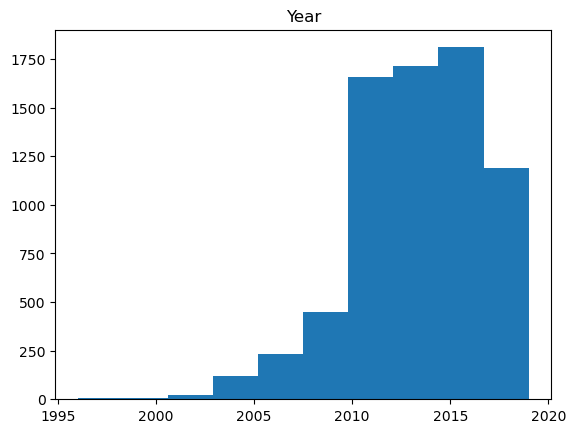

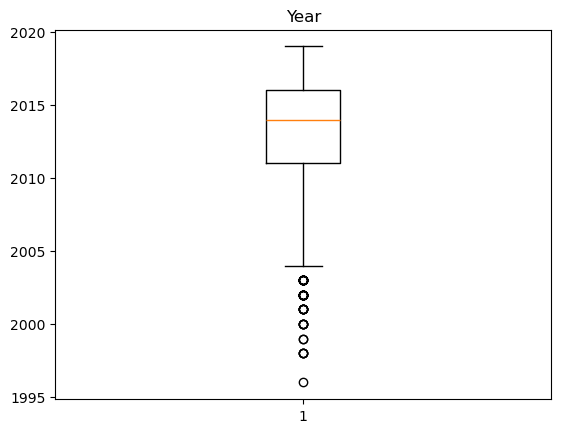

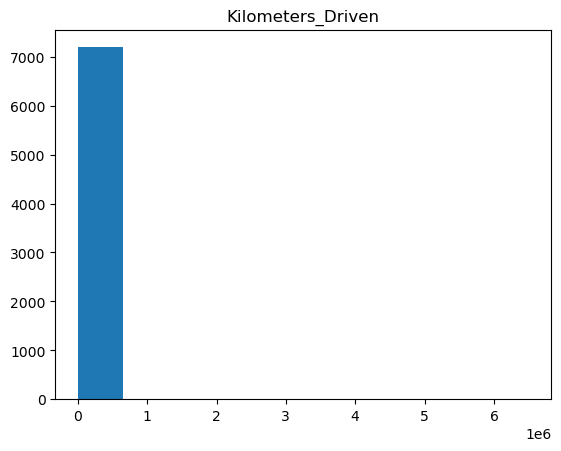

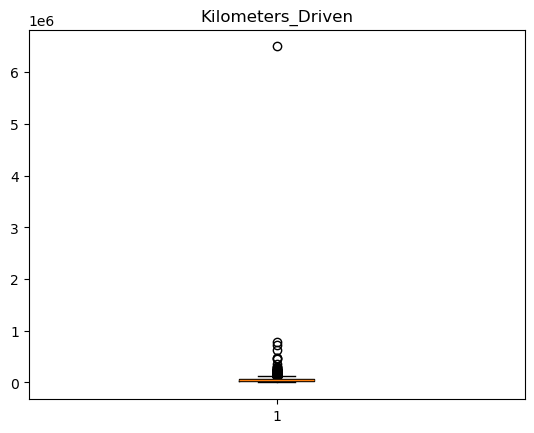

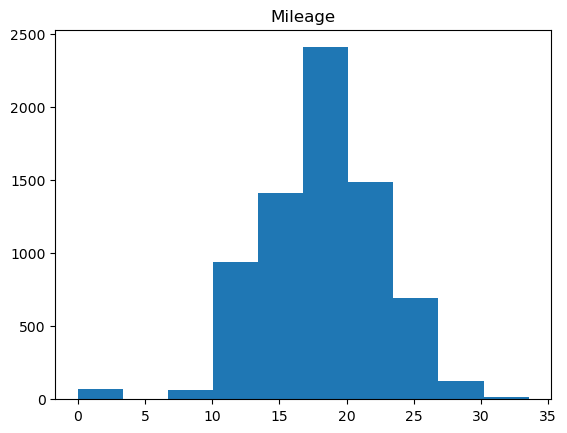

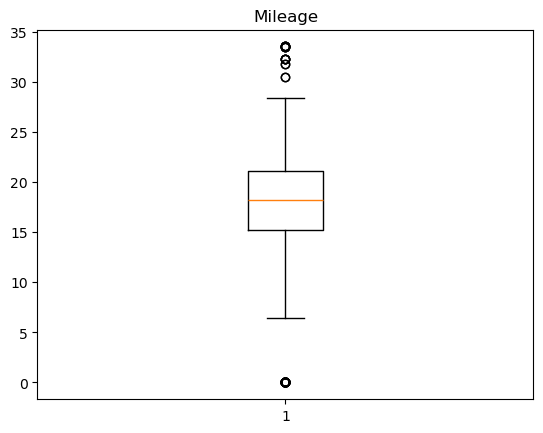

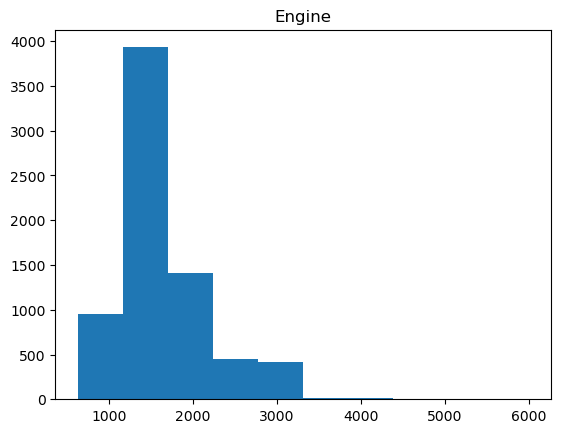

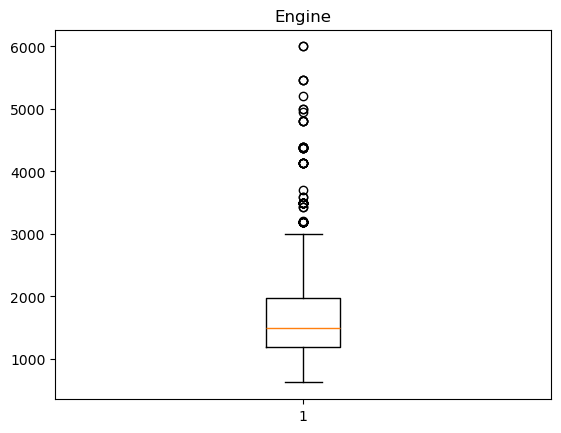

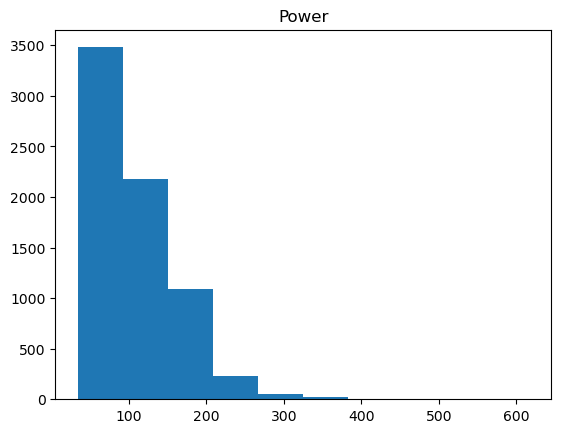

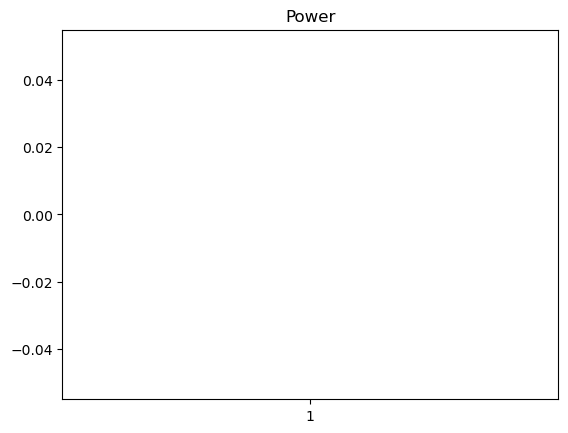

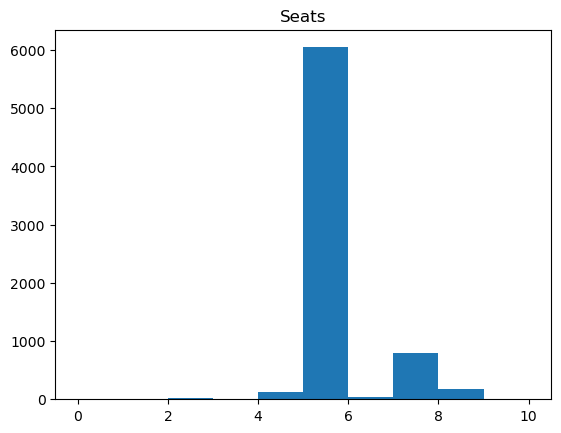

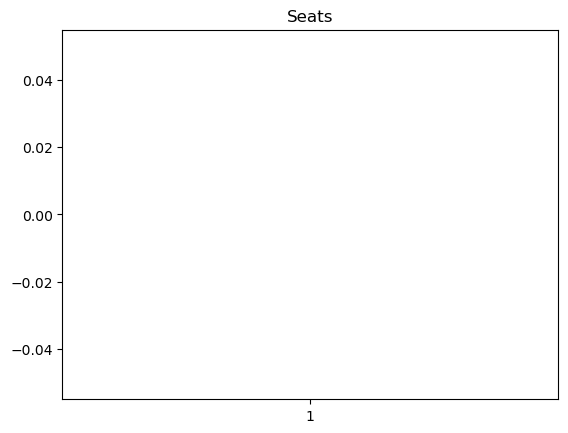

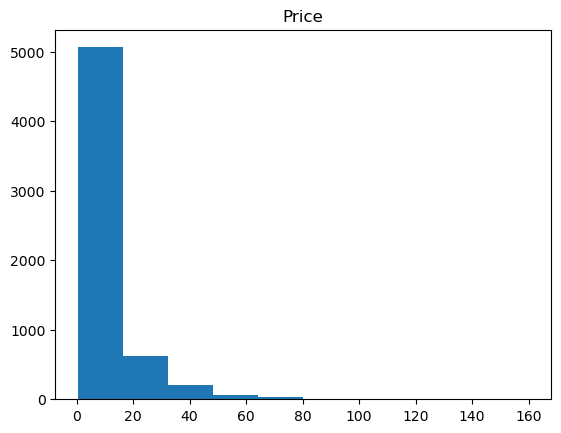

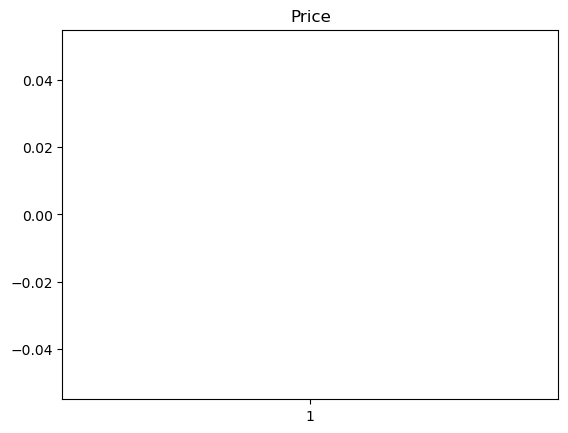

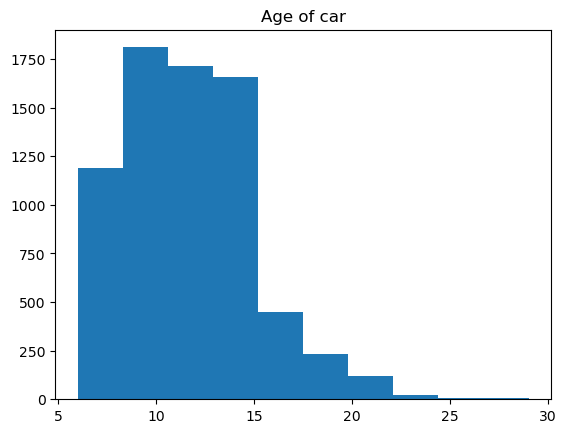

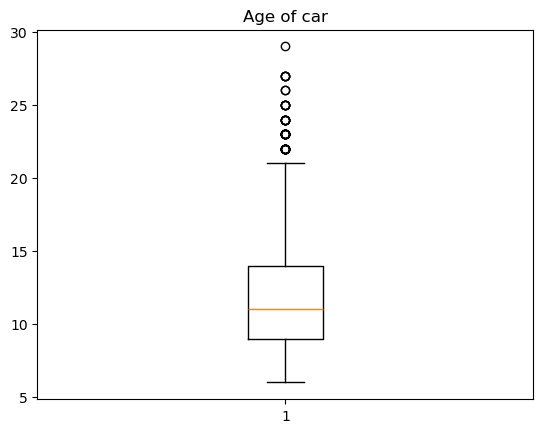

In [24]:
#  a histogram and box plot  for numerical variables univariate analysis
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()
    plt.boxplot(data_num[i])
    plt.title(i)
    plt.show()

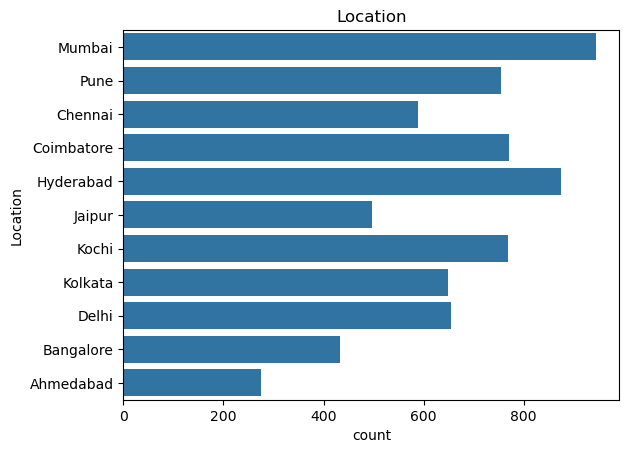

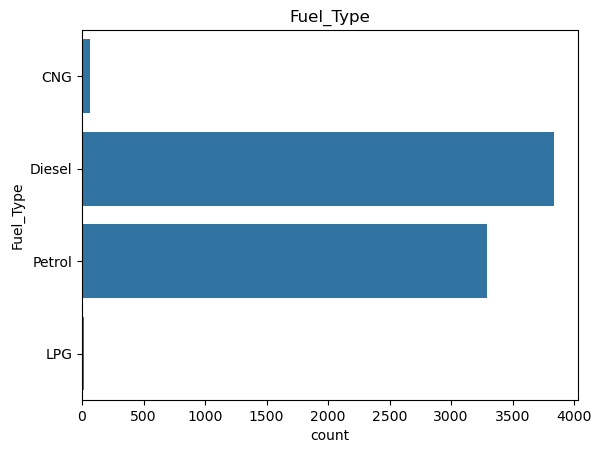

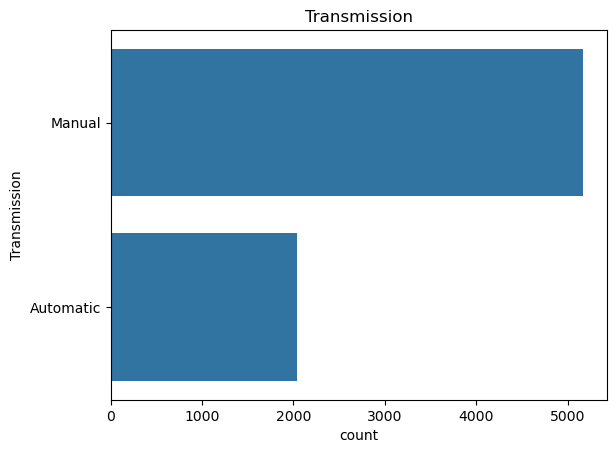

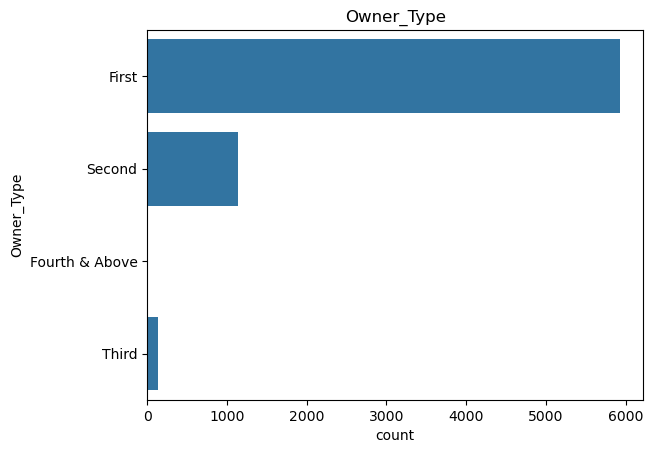

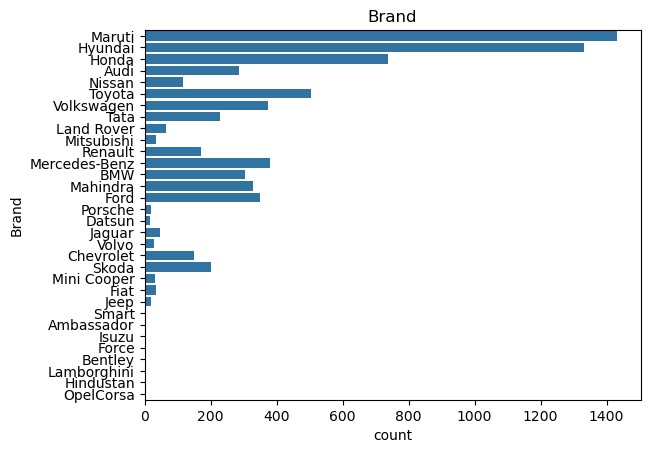

In [26]:
# visualizing categorical variables
for i in data_cat.columns:
    sns.countplot(data_cat[i])
    plt.title(i)
    plt.show()

In [27]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [28]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7205 non-null   object 
 1   Location               7205 non-null   object 
 2   Year                   7205 non-null   int64  
 3   Kilometers_Driven      7205 non-null   int64  
 4   Fuel_Type              7205 non-null   object 
 5   Transmission           7205 non-null   object 
 6   Owner_Type             7205 non-null   object 
 7   Mileage                7205 non-null   float64
 8   Engine                 7205 non-null   int64  
 9   Power                  7076 non-null   float64
 10  Seats                  7198 non-null   float64
 11  New_Price              1005 non-null   object 
 12  Price                  5981 non-null   float64
 13  Age of car             7205 non-null   int64  
 14  Brand                  7205 non-null   object 
 15  Model    

C:\Users\abul4\AppData\Local\Temp\ipykernel_23524\985065044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log")


<Axes: xlabel='Kilometers_Driven_log', ylabel='Density'>

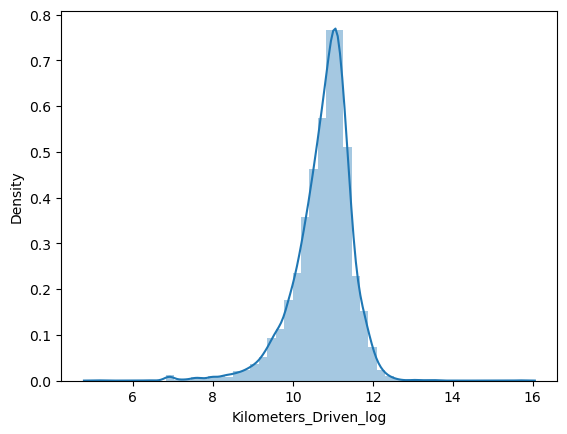

In [29]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log")

<Figure size 1300x1700 with 0 Axes>

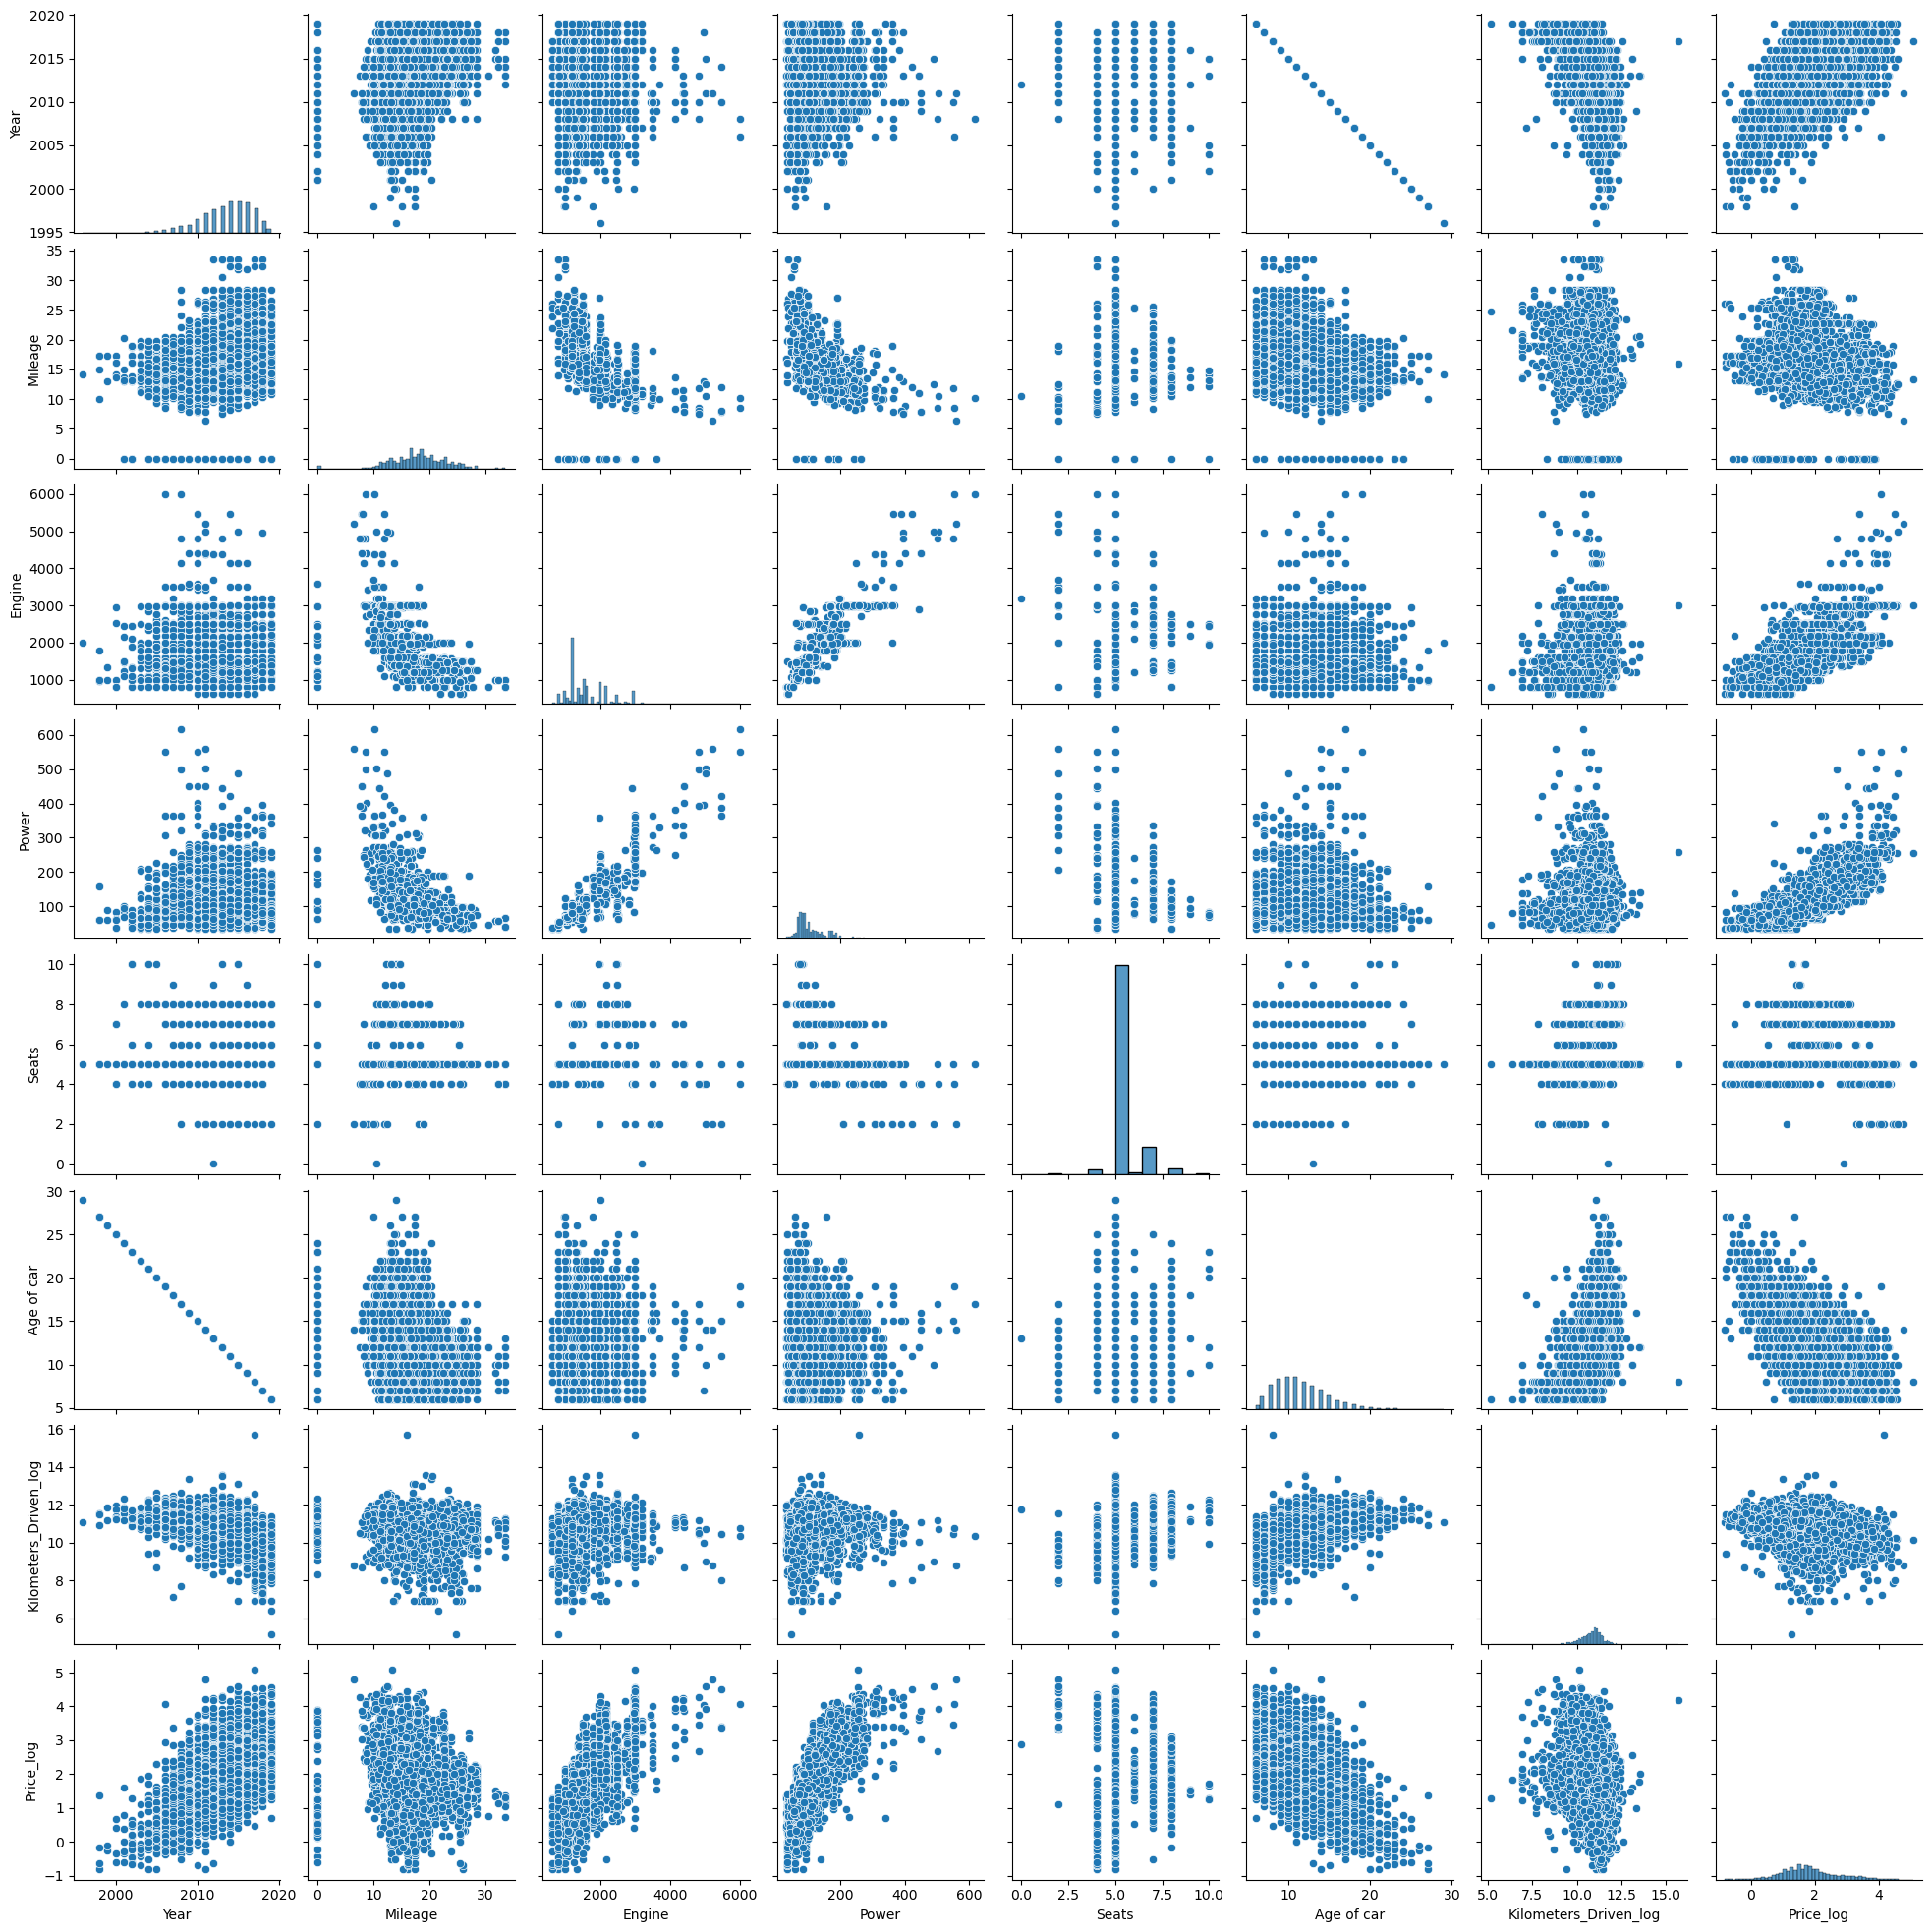

In [30]:
# bivariate analysis
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

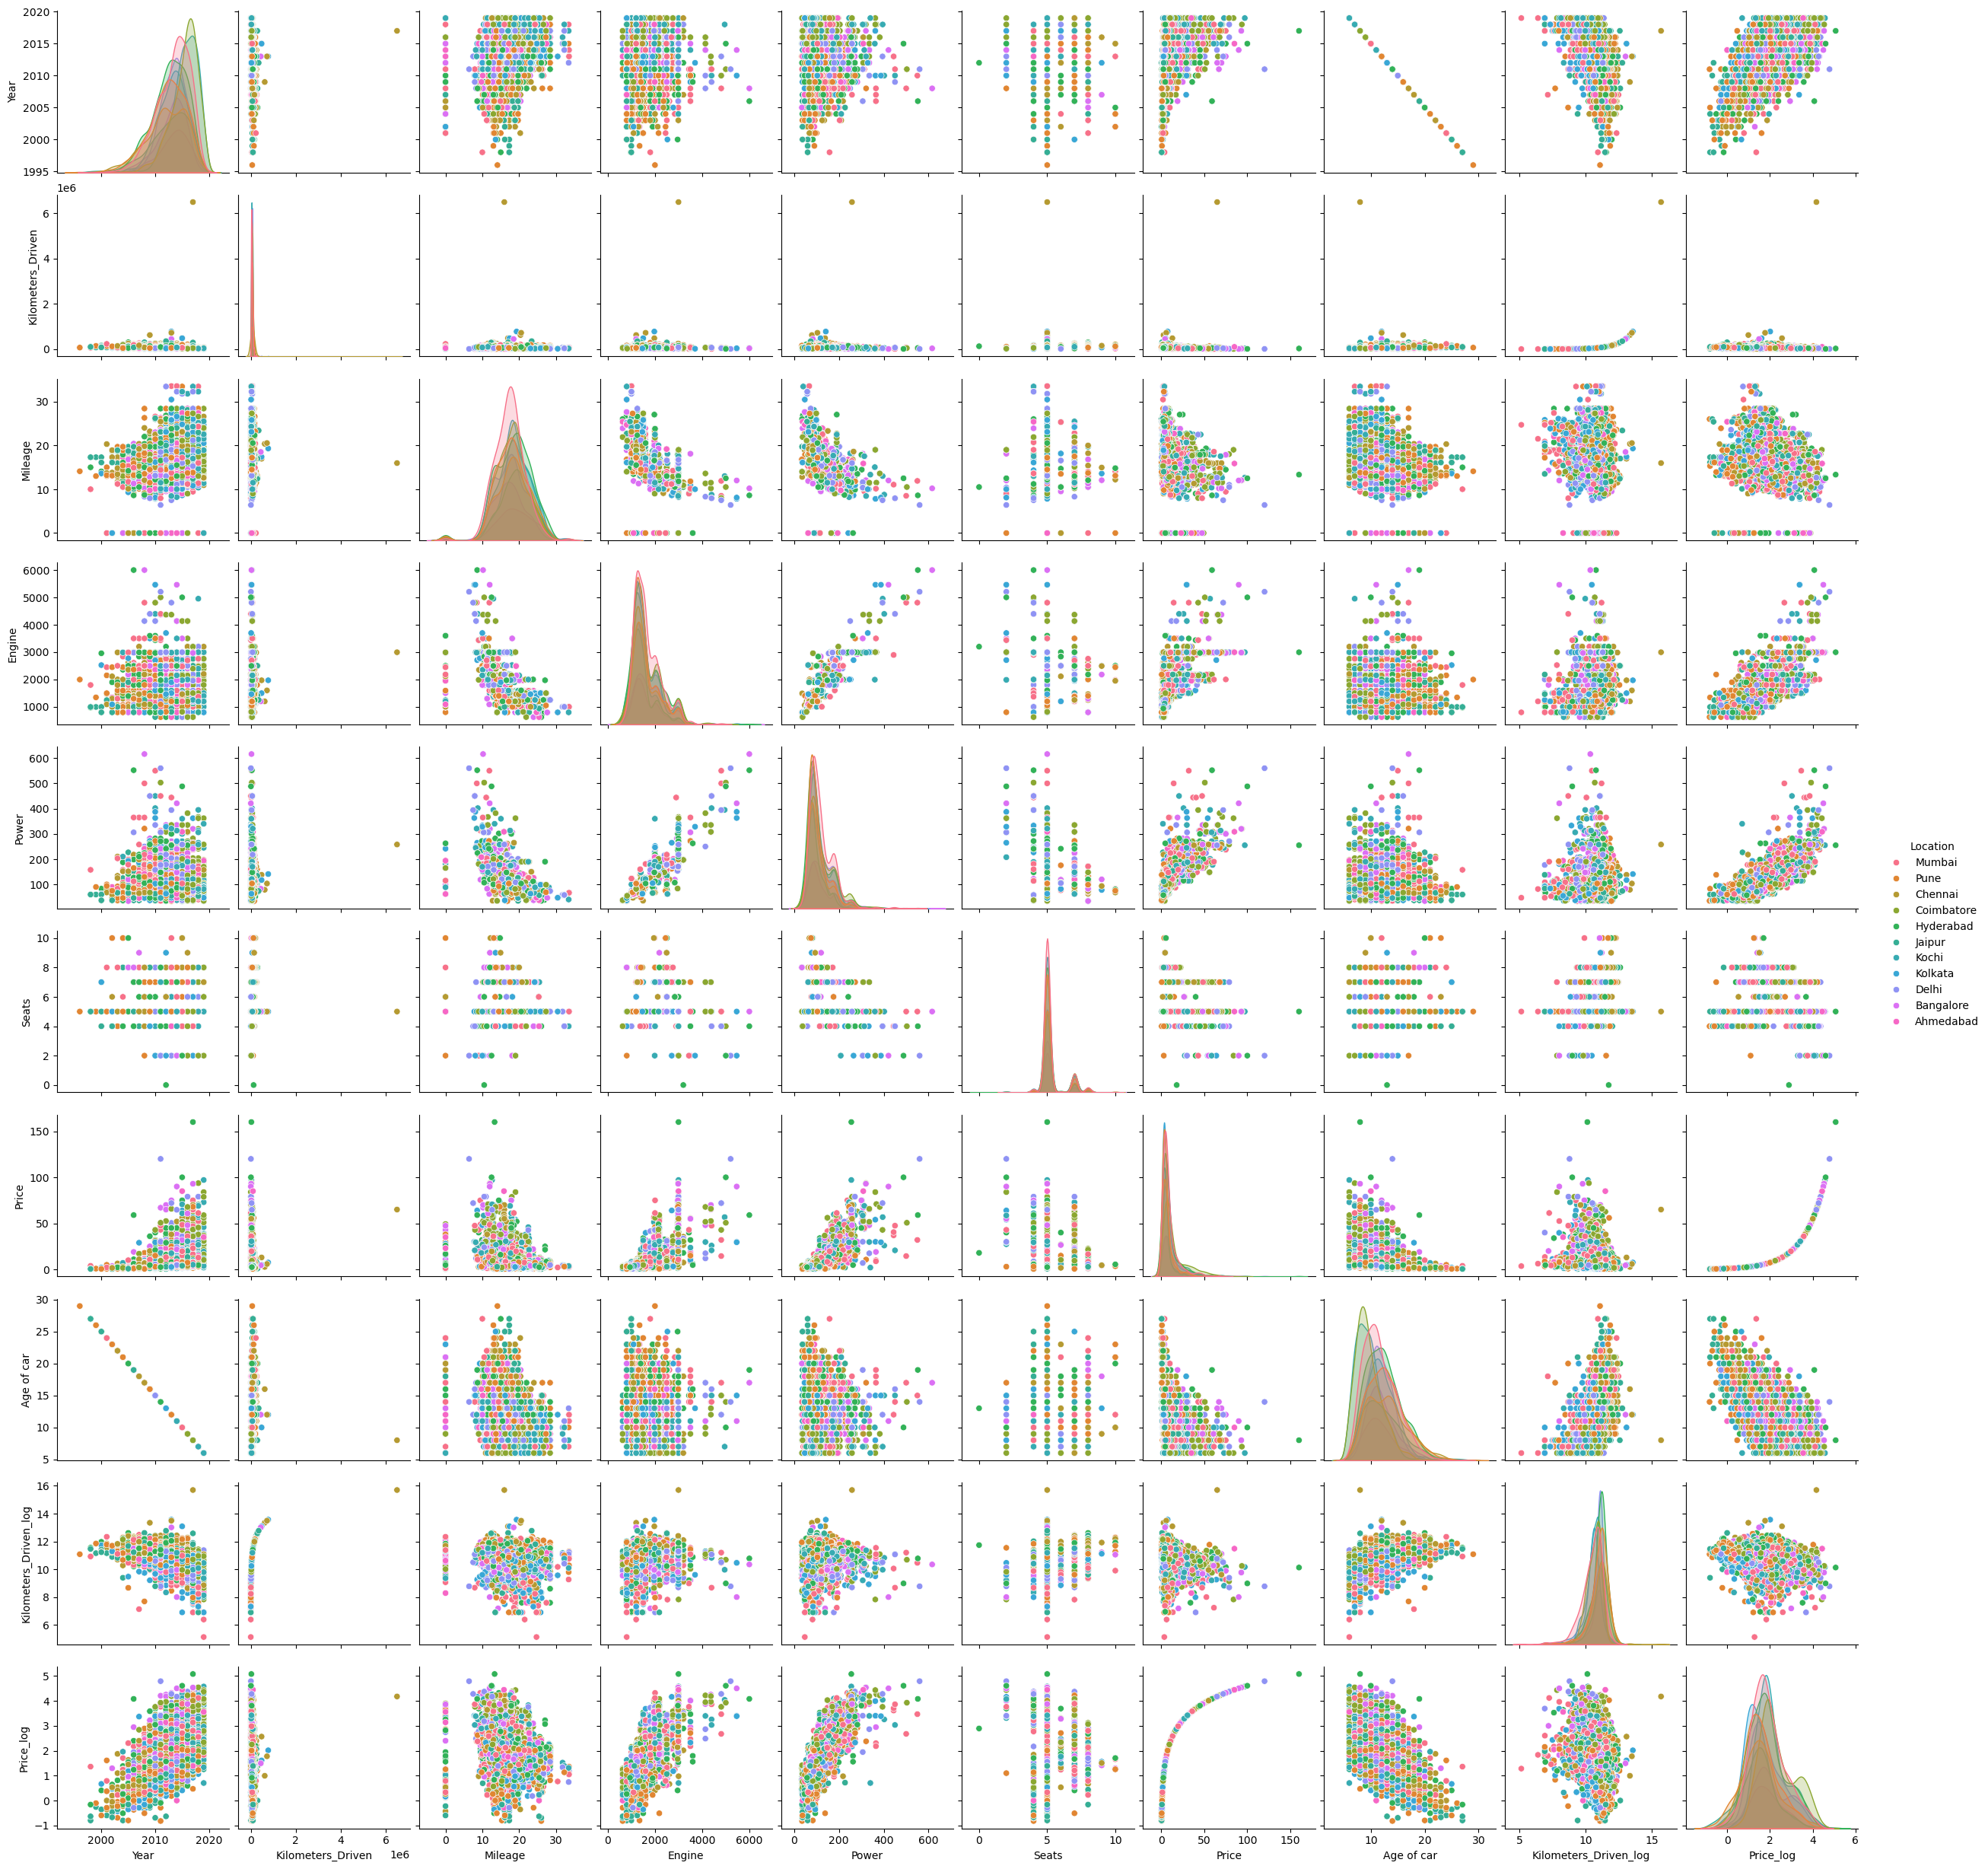

In [31]:
sns.pairplot(data,hue='Location')

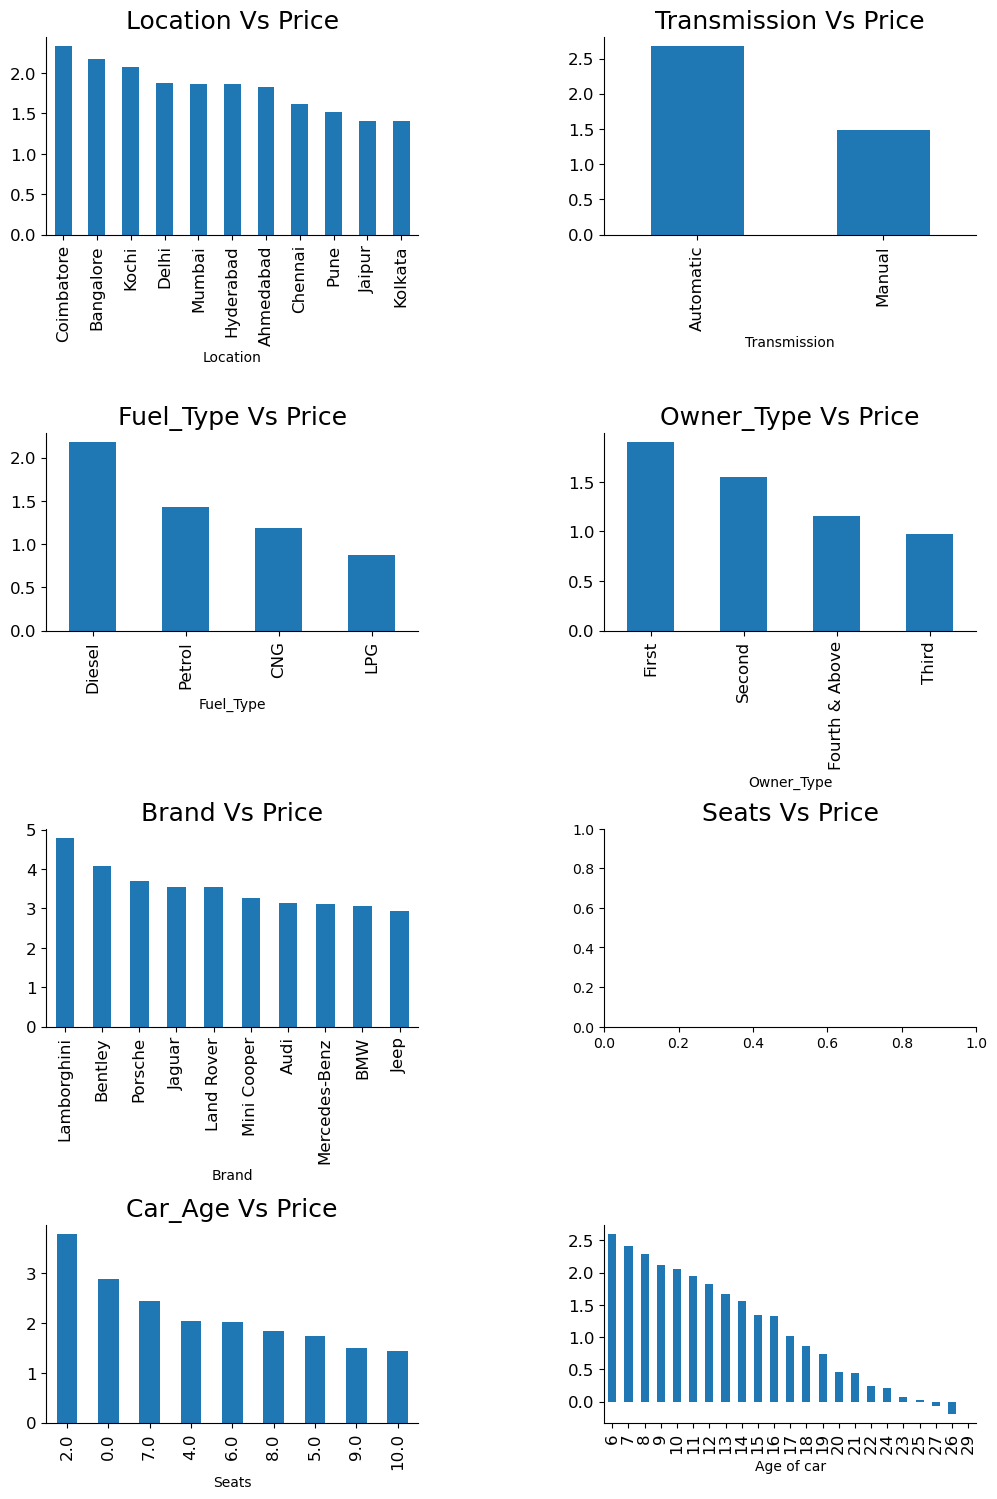

In [37]:
# relationship between Categorical variables and continuous variables 
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[2][1].set_title("Seats Vs Price", fontsize=18)
data.groupby('Age of car')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][0].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [41]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Age of car', 'Brand', 'Model',
       'Kilometers_Driven_log', 'Price_log'],
      dtype='object')

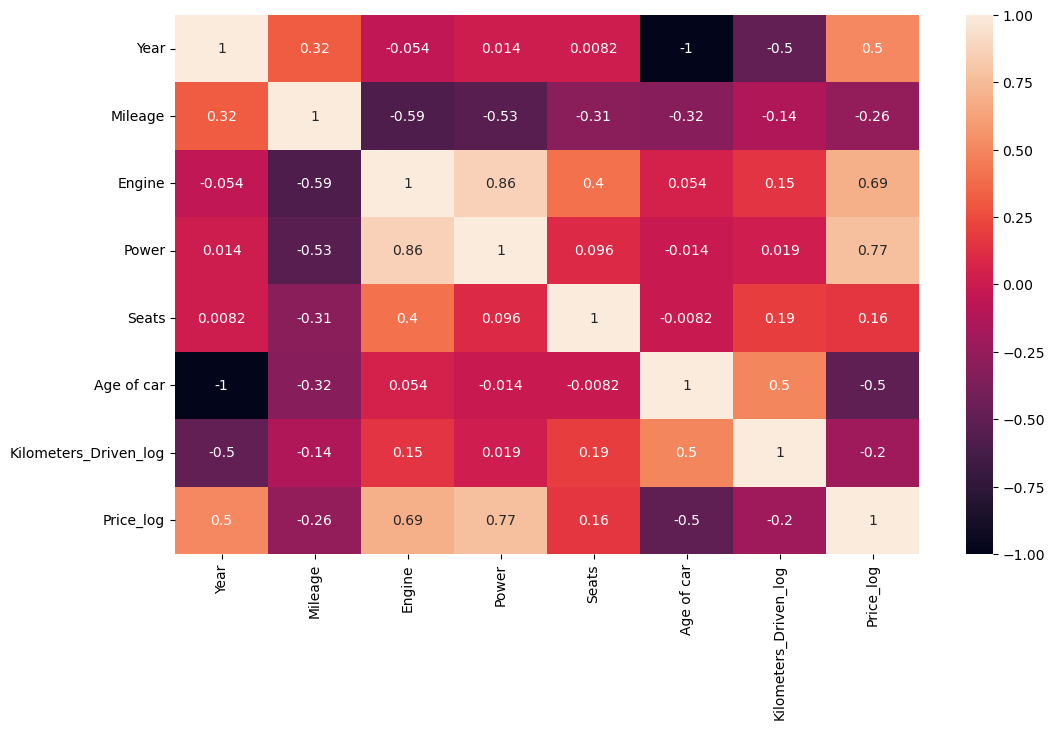

In [46]:
# multivariate analysis
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price','Brand','Model'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

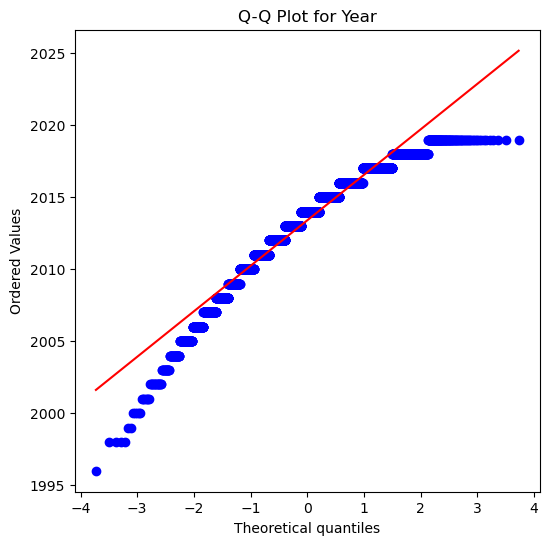

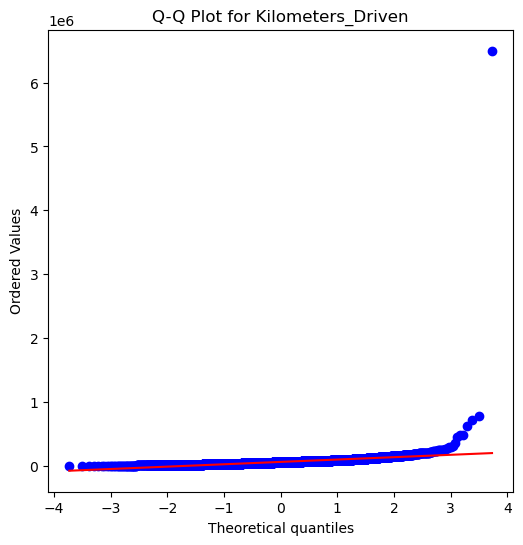

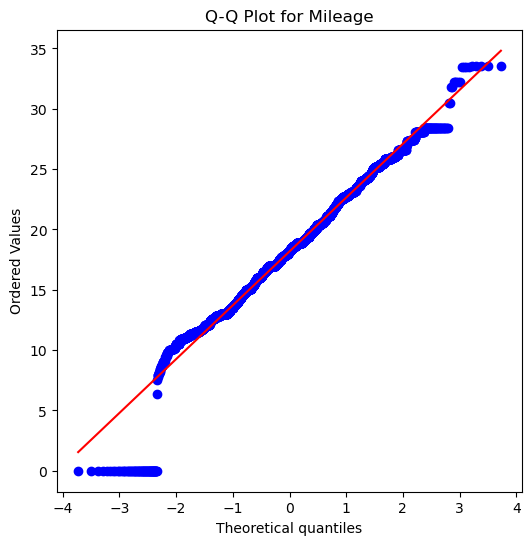

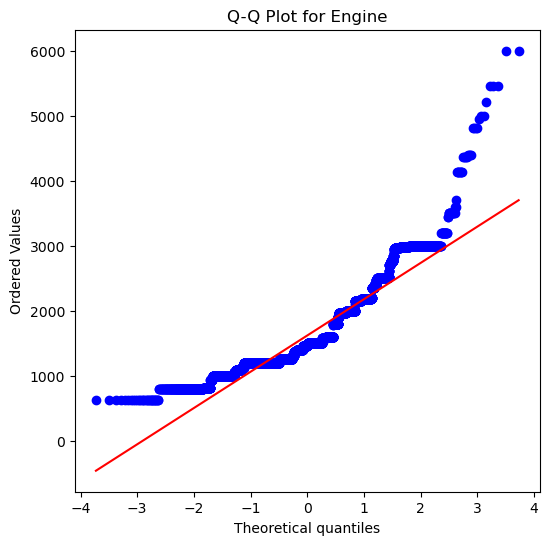

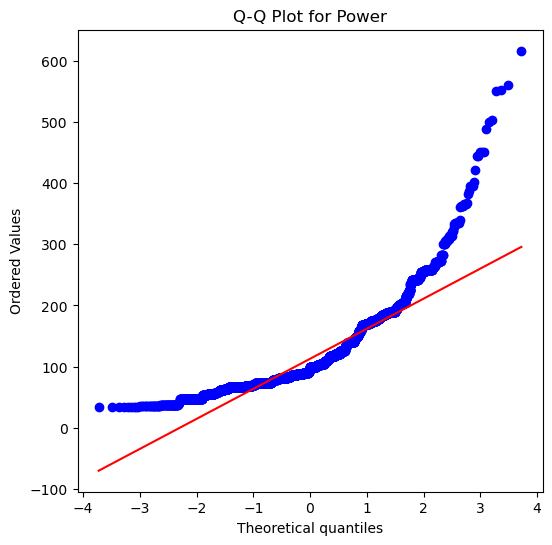

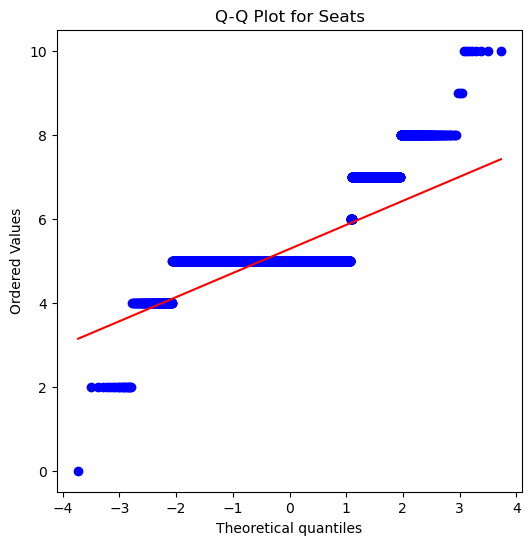

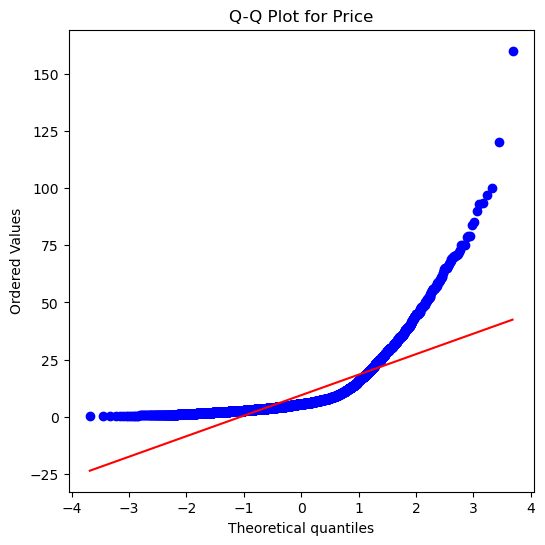

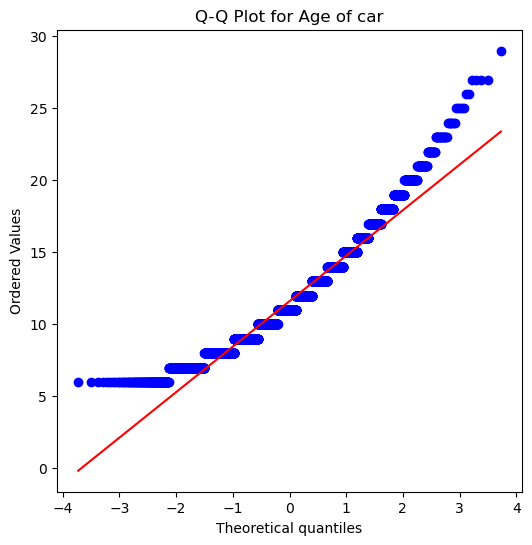

In [47]:
import scipy.stats as stats
for col in data_num.columns:
    plt.figure(figsize=(6, 6))
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()